# Exploratory Data Analysis
**Objective:** Analyze patterns in user preferences, model performance, and conversation characteristics.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Setup complete. Libraries imported.")

Setup complete. Libraries imported.


## Load Cleaned Data

In [3]:
df = pd.read_csv('../data/processed/arena_cleaned.csv')
print(f"Loaded: {df.shape[0]} rows * {df.shape[1]} columns")

Loaded: 57351 rows * 14 columns


## Overall Winner Distribution

In [ ]:
# Count winners
winner_counts = df['winner'].value_counts()
print(winner_counts)
print(f"\nTotal conversations: {len(df):,}")

winner
model_a    20039
model_b    19613
tie        17699
Name: count, dtype: int64

Total conversations: 57,351


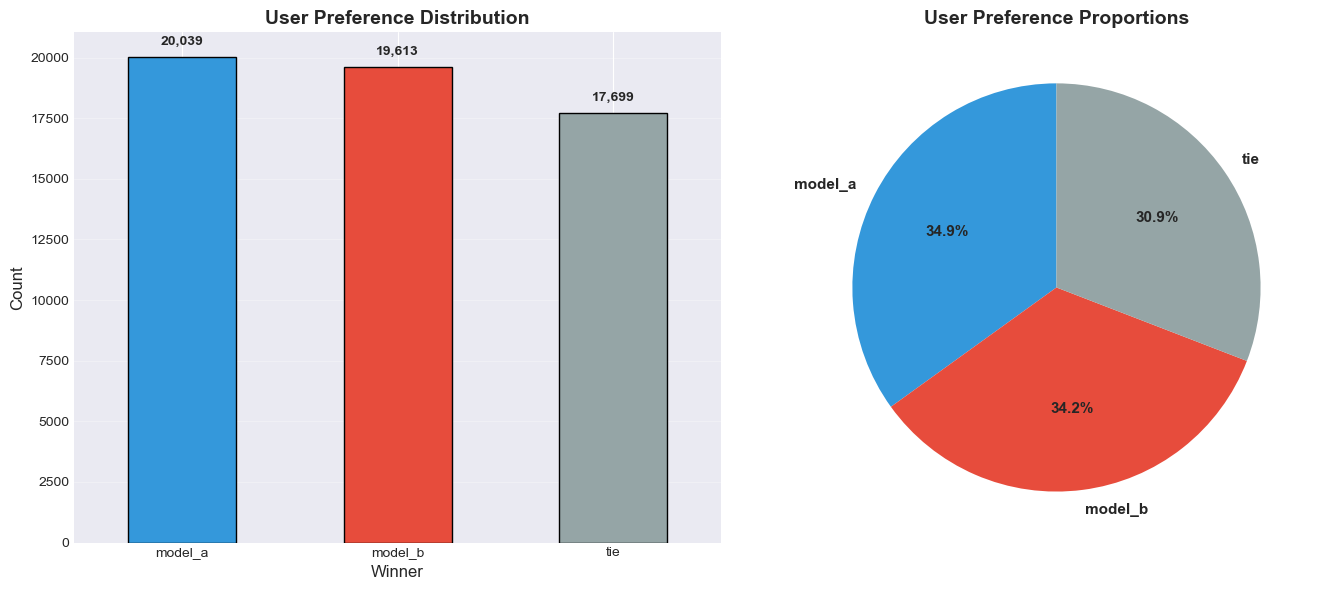

Saved: ../figures/winner_distribution.png


In [ ]:
# Visualize winner distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar Chart
winner_counts.plot(kind = 'bar', ax = ax1, color = ['#3498db', '#e74c3c', '#95a5a6'], edgecolor='black')
ax1.set_title('User Preference Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Winner', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=0)
ax1.grid(axis = 'y', alpha = 0.3)

# Add count labels on bars
for i, v in enumerate(winner_counts.values):
    ax1.text(i, v + 500, f'{v:,}', ha = 'center', fontweight = 'bold')

# Pie Chart
colors = ['#3498db', '#e74c3c', '#95a5a6']
ax2.pie(winner_counts.values, labels=winner_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('User Preference Proportions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/winner_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: ../figures/winner_distribution.png")

## Top 15 Most Common Models

In [7]:
# Combine both model columns
all_models = pd.concat([df['model_a'], df['model_b']])
model_freq = all_models.value_counts().head(15)

print("Top 15 models by appearance:")
print(model_freq)

Top 15 models by appearance:
gpt-4-1106-preview            7361
gpt-3.5-turbo-0613            7066
gpt-4-0613                    6140
claude-2.1                    5554
claude-instant-1              4128
gpt-4-0314                    4103
claude-1                      3965
vicuna-33b                    3709
mixtral-8x7b-instruct-v0.1    3535
vicuna-13b                    3443
llama-2-70b-chat              3422
gpt-3.5-turbo-1106            3345
mistral-medium                3307
llama-2-13b-chat              2602
claude-2.0                    2453
Name: count, dtype: int64


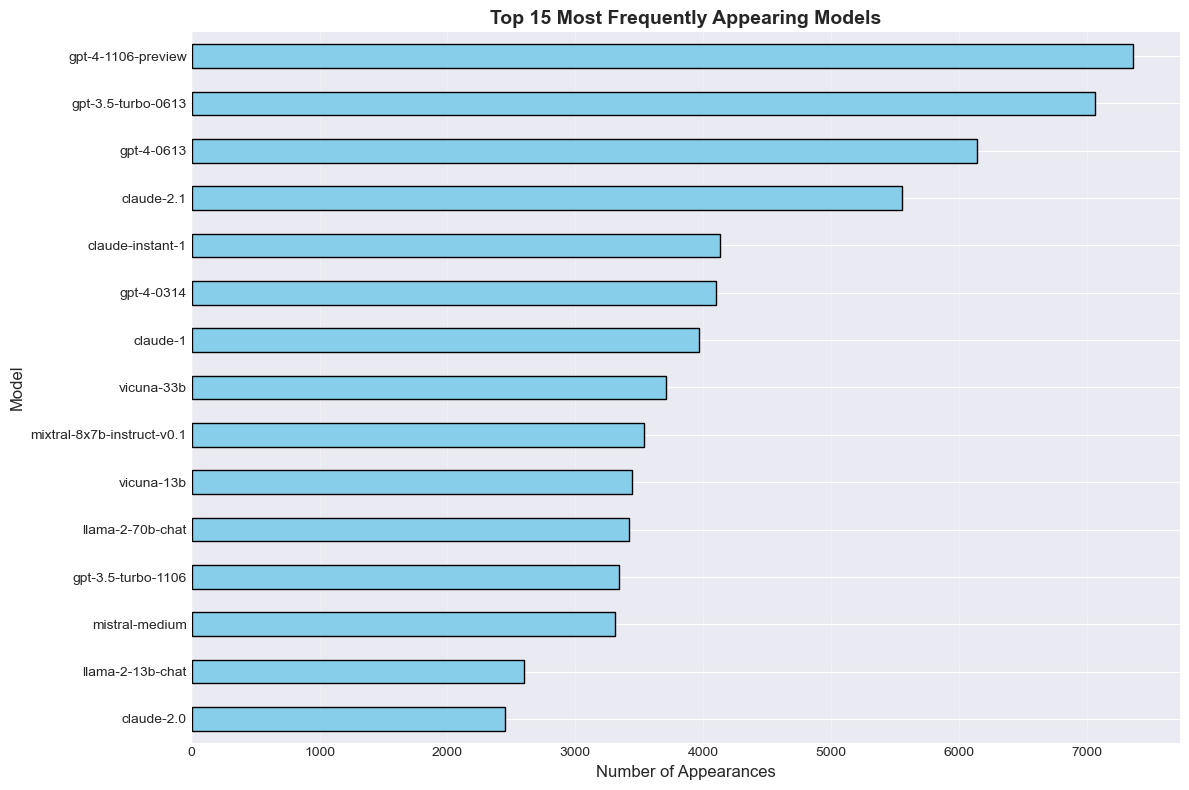

Saved: ../figures/top_models.png


In [8]:
# Visualize top models
plt.figure(figsize=(12, 8))
model_freq.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Number of Appearances', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Top 15 Most Frequently Appearing Models', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../figures/top_models.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: ../figures/top_models.png")

# Prompt Length Distribution

In [9]:
print("Prompt length statistics:")
print(df['prompt_length'].describe())
print(f"\nMedian: {df['prompt_length'].median():.0f} characters")

Prompt length statistics:
count    57351.000000
mean       368.842130
std       1073.962642
min          7.000000
25%         52.000000
50%         96.000000
75%        242.000000
max      33056.000000
Name: prompt_length, dtype: float64

Median: 96 characters


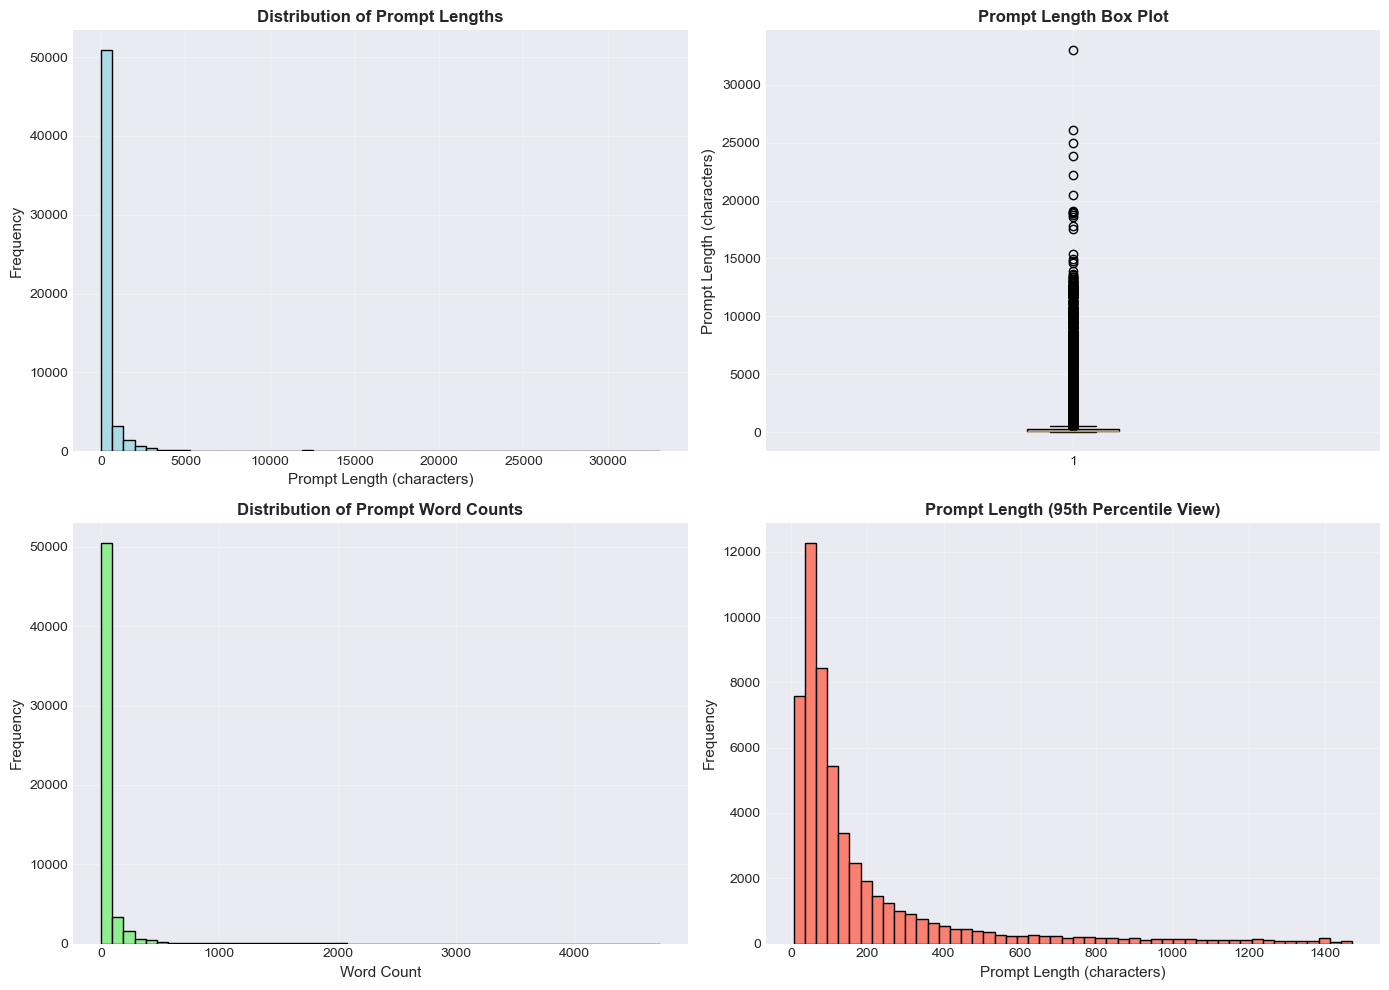

Saved: ../figures/prompt_length_analysis.png


In [10]:
# Visualize prompt lengths
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0, 0].hist(df['prompt_length'], bins=50, color='lightblue', edgecolor='black')
axes[0, 0].set_xlabel('Prompt Length (characters)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Prompt Lengths', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Box plot
axes[0, 1].boxplot(df['prompt_length'])
axes[0, 1].set_ylabel('Prompt Length (characters)', fontsize=11)
axes[0, 1].set_title('Prompt Length Box Plot', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Word count histogram
axes[1, 0].hist(df['prompt_word_count'], bins=50, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Word Count', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Distribution of Prompt Word Counts', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Zoomed histogram (95th percentile)
p95 = df['prompt_length'].quantile(0.95)
filtered = df[df['prompt_length'] <= p95]['prompt_length']
axes[1, 1].hist(filtered, bins=50, color='salmon', edgecolor='black')
axes[1, 1].set_xlabel('Prompt Length (characters)', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Prompt Length (95th Percentile View)', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/prompt_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: ../figures/prompt_length_analysis.png")

## Model Win Rates
Calculate which models win most often when they appear.

In [11]:
# Calculate win rates for each model
model_stats = []

for model in all_models.unique():
    # Appearances as model_a
    a_total = (df['model_a'] == model).sum()
    a_wins = ((df['model_a'] == model) & (df['winner'] == 'model_a')).sum()
    
    # Appearances as model_b
    b_total = (df['model_b'] == model).sum()
    b_wins = ((df['model_b'] == model) & (df['winner'] == 'model_b')).sum()
    
    # Combined stats
    total_appearances = a_total + b_total
    total_wins = a_wins + b_wins
    win_rate = (total_wins / total_appearances * 100) if total_appearances > 0 else 0
    
    model_stats.append({
        'Model': model,
        'Total Appearances': total_appearances,
        'Wins': total_wins,
        'Win Rate (%)': win_rate
    })

model_stats_df = pd.DataFrame(model_stats).sort_values('Win Rate (%)', ascending=False)
print("Top 15 models by win rate (minimum 100 appearances):")
top_models = model_stats_df[model_stats_df['Total Appearances'] >= 100].head(15)
print(top_models)

Top 15 models by win rate (minimum 100 appearances):
                 Model  Total Appearances  Wins  Win Rate (%)
0   gpt-4-1106-preview               7361  4065     55.223475
36  gpt-3.5-turbo-0314               1300   710     54.615385
22  gpt-4-0125-preview               1160   596     51.379310
7           gpt-4-0314               4103  1984     48.354862
13            claude-1               3965  1744     43.984868
24          gpt-4-0613               6140  2443     39.788274
16    claude-instant-1               4128  1642     39.777132
42    qwen1.5-72b-chat                550   215     39.090909
18          claude-2.0               2453   954     38.891154
30    llama-2-70b-chat               3422  1276     37.288136
48      mistral-medium               3307  1218     36.830965
38         yi-34b-chat               1445   530     36.678201
33        wizardlm-13b               1577   571     36.207990
4           vicuna-13b               3443  1243     36.102236
58         guanac

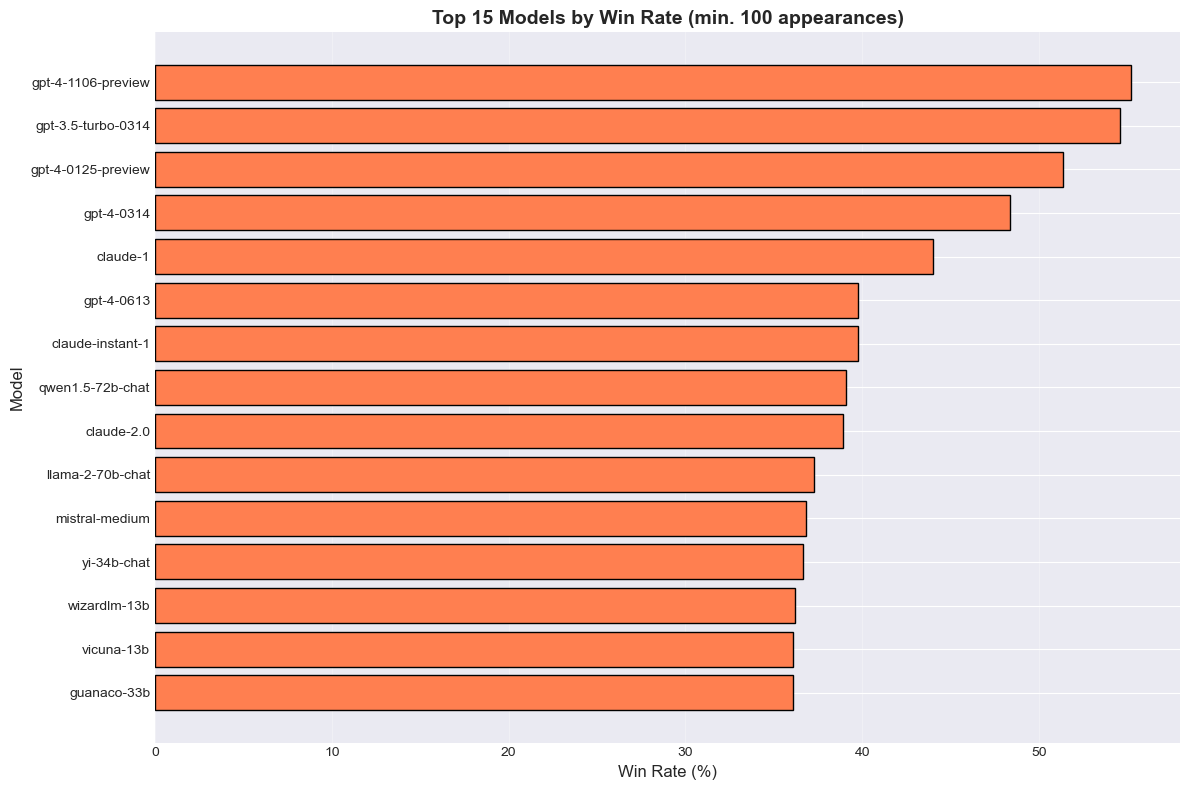

Saved: ../figures/model_win_rates.png


In [13]:
# Visualize top win rates
plt.figure(figsize=(12, 8))
plt.barh(top_models['Model'], top_models['Win Rate (%)'], color='coral', edgecolor='black')
plt.xlabel('Win Rate (%)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Top 15 Models by Win Rate (min. 100 appearances)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../figures/model_win_rates.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: ../figures/model_win_rates.png")

## Response Length Analysis

Compare response lengths between models that won vs lost.

In [14]:
# Compare response lengths by winner
print("Response length by outcome:")
print("\nModel A wins - Response A length:")
print(df[df['winner'] == 'model_a']['response_a_length'].describe())

print("\nModel B wins - Response B length:")
print(df[df['winner'] == 'model_b']['response_b_length'].describe())

print("\nTies - Both response lengths:")
print("Response A:", df[df['winner'] == 'tie']['response_a_length'].mean())
print("Response B:", df[df['winner'] == 'tie']['response_b_length'].mean())

Response length by outcome:

Model A wins - Response A length:
count    20039.000000
mean      1568.509407
std       1645.601217
min          4.000000
25%        542.000000
50%       1285.000000
75%       2055.000000
max      54058.000000
Name: response_a_length, dtype: float64

Model B wins - Response B length:
count    19613.000000
mean      1571.387294
std       1628.312729
min          5.000000
25%        545.000000
50%       1307.000000
75%       2086.000000
max      46077.000000
Name: response_b_length, dtype: float64

Ties - Both response lengths:
Response A: 1261.6061359398836
Response B: 1267.4499124244307


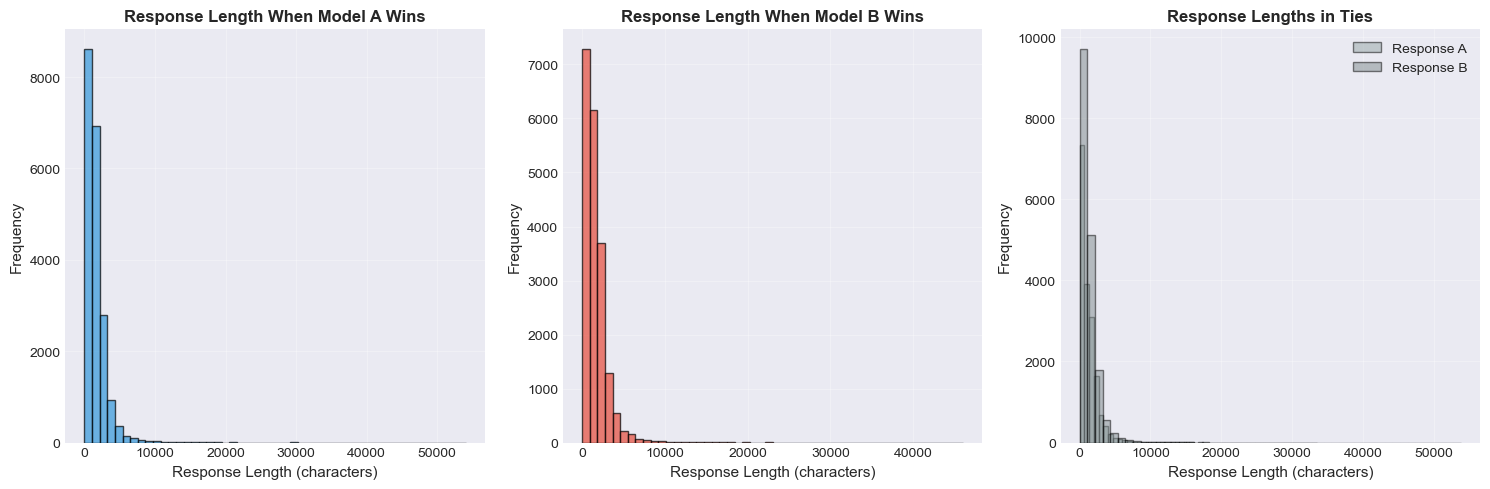

Saved: ../figures/response_length_by_winner.png


In [16]:
# Visualize response lengths by winner
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Model A wins
axes[0].hist(df[df['winner'] == 'model_a']['response_a_length'], bins=50, 
             color='#3498db', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Response Length (characters)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Response Length When Model A Wins', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Model B wins
axes[1].hist(df[df['winner'] == 'model_b']['response_b_length'], bins=50, 
             color='#e74c3c', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Response Length (characters)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Response Length When Model B Wins', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

# Ties - compare both
axes[2].hist(df[df['winner'] == 'tie']['response_a_length'], bins=50, 
             color='#95a5a6', edgecolor='black', alpha=0.5, label='Response A')
axes[2].hist(df[df['winner'] == 'tie']['response_b_length'], bins=50, 
             color='#7f8c8d', edgecolor='black', alpha=0.5, label='Response B')
axes[2].set_xlabel('Response Length (characters)', fontsize=11)
axes[2].set_ylabel('Frequency', fontsize=11)
axes[2].set_title('Response Lengths in Ties', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/response_length_by_winner.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: ../figures/response_length_by_winner.png")

## Correlation: Prompt Length vs Response Length

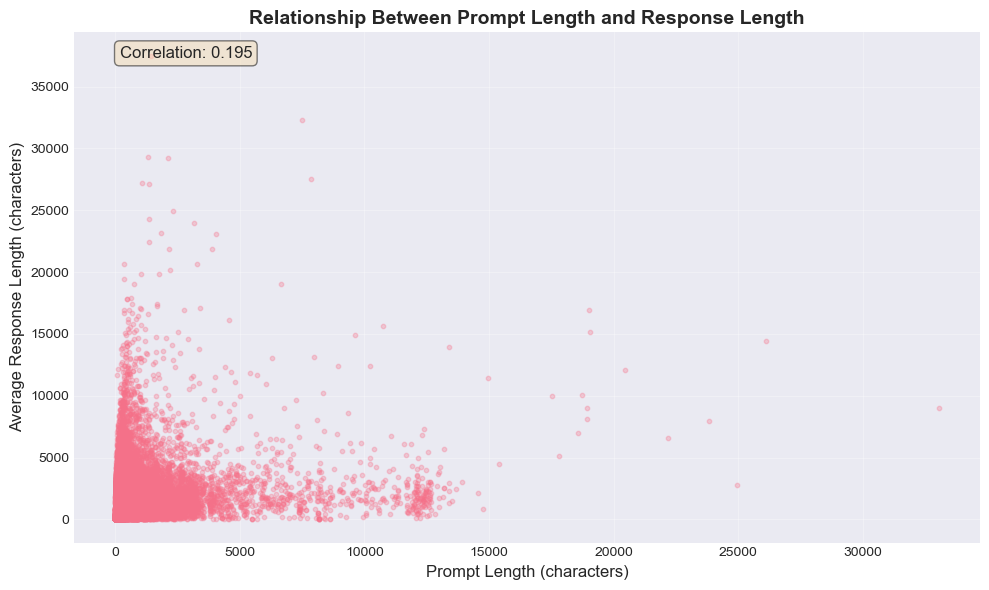

Saved: ../figures/prompt_vs_response_length.png


In [18]:
# Scatter plot: prompt length vs average response length
df['avg_response_length'] = (df['response_a_length'] + df['response_b_length']) / 2

plt.figure(figsize=(10, 6))
plt.scatter(df['prompt_length'], df['avg_response_length'], alpha=0.3, s=10)
plt.xlabel('Prompt Length (characters)', fontsize=12)
plt.ylabel('Average Response Length (characters)', fontsize=12)
plt.title('Relationship Between Prompt Length and Response Length', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Add correlation coefficient
correlation = df['prompt_length'].corr(df['avg_response_length'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../figures/prompt_vs_response_length.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: ../figures/prompt_vs_response_length.png")

## Model Family Analysis

Group models by family (GPT, Claude, Llama, etc.) and compare performance.

In [19]:
# Extract model family from model name
def get_model_family(model_name):
    model_name_lower = model_name.lower()
    if 'gpt' in model_name_lower:
        return 'GPT'
    elif 'claude' in model_name_lower:
        return 'Claude'
    elif 'llama' in model_name_lower:
        return 'Llama'
    elif 'mistral' in model_name_lower or 'mixtral' in model_name_lower:
        return 'Mistral'
    elif 'gemini' in model_name_lower or 'palm' in model_name_lower:
        return 'Google'
    elif 'vicuna' in model_name_lower:
        return 'Vicuna'
    else:
        return 'Other'

# Add family columns
df['model_a_family'] = df['model_a'].apply(get_model_family)
df['model_b_family'] = df['model_b'].apply(get_model_family)

# Count by family
all_models_with_family = pd.concat([
    df['model_a_family'],
    df['model_b_family']
])

family_counts = all_models_with_family.value_counts()
print("Model appearances by family:")
print(family_counts)

Model appearances by family:
Other      32524
GPT        31743
Claude     16100
Llama      10503
Mistral    10208
Vicuna      8740
Google      4884
Name: count, dtype: int64


In [20]:
# Calculate win rates by family
family_stats = []

for family in family_counts.index:
    # Appearances as model_a
    a_total = (df['model_a_family'] == family).sum()
    a_wins = ((df['model_a_family'] == family) & (df['winner'] == 'model_a')).sum()
    
    # Appearances as model_b
    b_total = (df['model_b_family'] == family).sum()
    b_wins = ((df['model_b_family'] == family) & (df['winner'] == 'model_b')).sum()
    
    # Combined
    total = a_total + b_total
    wins = a_wins + b_wins
    win_rate = (wins / total * 100) if total > 0 else 0
    
    family_stats.append({
        'Family': family,
        'Appearances': total,
        'Wins': wins,
        'Win Rate (%)': win_rate
    })

family_df = pd.DataFrame(family_stats).sort_values('Win Rate (%)', ascending=False)
print("\nWin rates by model family:")
print(family_df)


Win rates by model family:
    Family  Appearances   Wins  Win Rate (%)
1      GPT        31743  13400     42.214031
2   Claude        16100   6038     37.503106
5   Vicuna         8740   2958     33.844394
6   Google         4884   1582     32.391482
4  Mistral        10208   3305     32.376567
3    Llama        10503   3379     32.171760
0    Other        32524   8990     27.641127


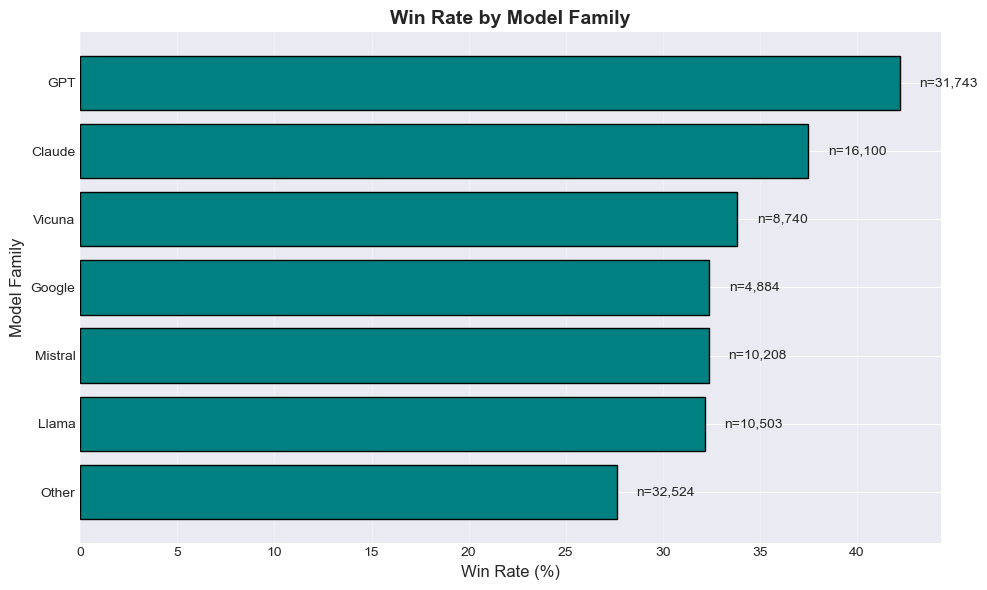

Saved: ../figures/family_win_rates.png


In [22]:
# Visualize family win rates
plt.figure(figsize=(10, 6))
plt.barh(family_df['Family'], family_df['Win Rate (%)'], color='teal', edgecolor='black')
plt.xlabel('Win Rate (%)', fontsize=12)
plt.ylabel('Model Family', fontsize=12)
plt.title('Win Rate by Model Family', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add count labels
for i, (family, rate, count) in enumerate(zip(family_df['Family'], 
                                                family_df['Win Rate (%)'], 
                                                family_df['Appearances'])):
    plt.text(rate + 1, i, f'n={count:,}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../figures/family_win_rates.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: ../figures/family_win_rates.png")

## Summary Statistics

Key findings from exploratory analysis.

In [24]:
print("="*70)
print("Exploratory Analysis Summary")
print("="*70)

print(f"\nTotal Conversations: {len(df):,}")
print(f"Unique Models: {len(model_freq)}")
print(f"Model Families: {len(family_counts)}")

print(f"\nWinner Distribution:")
print(f"  Model A wins: {(df['winner'] == 'model_a').sum():,} ({(df['winner'] == 'model_a').sum()/len(df)*100:.1f}%)")
print(f"  Model B wins: {(df['winner'] == 'model_b').sum():,} ({(df['winner'] == 'model_b').sum()/len(df)*100:.1f}%)")
print(f"  Ties: {(df['winner'] == 'tie').sum():,} ({(df['winner'] == 'tie').sum()/len(df)*100:.1f}%)")

print(f"\nTop 3 Models by Win Rate:")
for i, row in top_models.head(3).iterrows():
    print(f"  {row['Model']}: {row['Win Rate (%)']:.1f}%")

print(f"\nTop 3 Families by Win Rate:")
for i, row in family_df.head(3).iterrows():
    print(f"  {row['Family']}: {row['Win Rate (%)']:.1f}%")

print(f"\nPrompt Statistics:")
print(f"  Average length: {df['prompt_length'].mean():.0f} characters")
print(f"  Average words: {df['prompt_word_count'].mean():.0f} words")

print(f"\nResponse Statistics:")
print(f"  Average response length: {df['avg_response_length'].mean():.0f} characters")
print(f"  Prompt-Response correlation: {correlation:.3f}")

Exploratory Analysis Summary

Total Conversations: 57,351
Unique Models: 15
Model Families: 7

Winner Distribution:
  Model A wins: 20,039 (34.9%)
  Model B wins: 19,613 (34.2%)
  Ties: 17,699 (30.9%)

Top 3 Models by Win Rate:
  gpt-4-1106-preview: 55.2%
  gpt-3.5-turbo-0314: 54.6%
  gpt-4-0125-preview: 51.4%

Top 3 Families by Win Rate:
  GPT: 42.2%
  Claude: 37.5%
  Vicuna: 33.8%

Prompt Statistics:
  Average length: 369 characters
  Average words: 54 words

Response Statistics:
  Average response length: 1384 characters
  Prompt-Response correlation: 0.195
